In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("AXISBANK.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-08,726.000000,747.799988,726.000000,736.150024,736.150024,15662890
1,2021-02-09,735.750000,750.000000,726.200012,742.500000,742.500000,22307807
2,2021-02-10,741.549988,746.400024,726.099976,734.799988,734.799988,15140744
3,2021-02-11,731.000000,744.150024,731.000000,740.099976,740.099976,11897710
4,2021-02-12,735.500000,754.700012,734.549988,750.400024,750.400024,15668442


In [4]:
Y = df['Close']
X = df.drop(columns =["Date","Adj Close","Close"], axis=1)
Y

0      736.150024
1      742.500000
2      734.799988
3      740.099976
4      750.400024
          ...    
244    804.099976
245    799.549988
246    798.549988
247    789.599976
248    798.549988
Name: Close, Length: 249, dtype: float64

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
Y = scaler.fit_transform(np.array(Y).reshape(-1,1))
Y

array([[0.4799525 ],
       [0.51026264],
       [0.47350841],
       [0.49880668],
       [0.54797159],
       [0.75608603],
       [0.66563252],
       [0.6785204 ],
       [0.67494045],
       [0.54439164],
       [0.40023884],
       [0.38353239],
       [0.54319832],
       [0.6446303 ],
       [0.42577571],
       [0.44367547],
       [0.45656336],
       [0.56491664],
       [0.48305495],
       [0.45417673],
       [0.5140812 ],
       [0.52434385],
       [0.59737482],
       [0.54892601],
       [0.51933197],
       [0.48758961],
       [0.44057302],
       [0.39689749],
       [0.43269701],
       [0.38472571],
       [0.45322201],
       [0.33794772],
       [0.28162291],
       [0.29880685],
       [0.28520286],
       [0.2952269 ],
       [0.36945119],
       [0.23699295],
       [0.20190954],
       [0.25131276],
       [0.21957041],
       [0.15560876],
       [0.        ],
       [0.12124116],
       [0.15871122],
       [0.16038203],
       [0.05990476],
       [0.077

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
x_train

array([[0.14497194, 0.07715892, 0.12902397, 0.27038272],
       [0.53195482, 0.48065108, 0.60160957, 0.14681961],
       [0.66964271, 0.61208116, 0.67831984, 0.31862207],
       [0.68796988, 0.65125052, 0.76634801, 0.06803483],
       [0.6597744 , 0.571024  , 0.7037222 , 0.03980164],
       [0.54934209, 0.4978763 , 0.60311857, 0.08760628],
       [0.33082711, 0.25011795, 0.32922513, 0.24329149],
       [0.35902259, 0.33931107, 0.40417495, 0.47207129],
       [0.73731198, 0.71944311, 0.81715273, 0.27508656],
       [0.07236852, 0.        , 0.        , 0.2601248 ],
       [0.5798872 , 0.55686638, 0.64562366, 0.169289  ],
       [0.20982149, 0.20528549, 0.26332988, 0.14563247],
       [0.36372184, 0.27371399, 0.25528171, 0.29938986],
       [0.39191732, 0.31595094, 0.39436604, 0.12232217],
       [0.5798872 , 0.51156211, 0.63732374, 0.05216438],
       [0.55639096, 0.46720146, 0.45271633, 0.40687637],
       [0.63604326, 0.55899008, 0.69089529, 0.09064669],
       [0.46945489, 0.47050496,

In [7]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM 
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [10]:
# LSTM MODEL
model = Sequential()

# IF you are running with a GPU, try out the CuDNNLSTM layer type instead (don't pass an activation, tanh is required)
model.add(LSTM(128, input_shape=(x_train.shape[1], 1), activation='relu', return_sequences=True))

model.add(LSTM(128, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

C:\Users\electromera\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 202,305
Trainable params: 202,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [13]:
# ARIMA 
# ADF test
from statsmodels.tsa.stattools import adfuller

In [14]:
# check if data is stationary
# if p-value > 0.05 we will need to differencing
result = adfuller(df.Close.dropna())
print(f"ADF statistics: {result[0]}")
print(f"p-value: {result[1]}")

ADF statistics: -2.4435028307047144
p-value: 0.1298324888452843


In [15]:
# choose no. of d
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close, test="adf")

1

In [16]:
# partial autocorrelation function to choose p
from statsmodels.graphics.tsaplots import plot_pacf

diff =df.Close.diff().dropna()


C:\Users\electromera\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


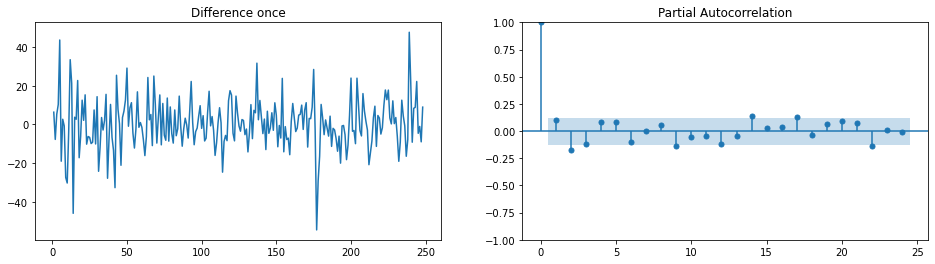

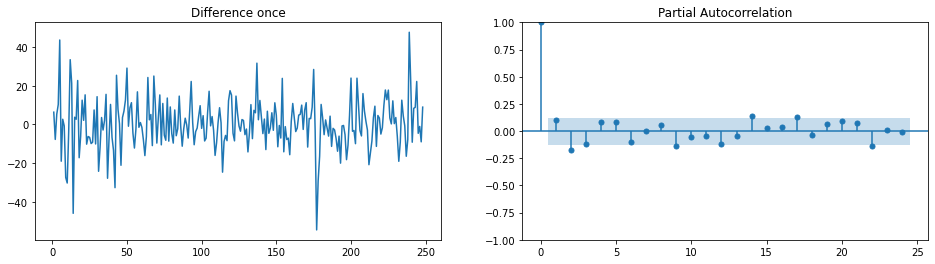

In [17]:
# p=14 above signifficant line, q=17
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2)

In [18]:
df_train = df[df.Date < "2022"]
df_valid = df[df.Date >= "2022"]
df_valid

,Date,Open,High,Low,Close,Adj Close,Volume
223,2022-01-03,680.250000,698.500000,679.000000,696.349976,696.349976,8550860
224,2022-01-04,701.000000,711.049988,700.049988,709.150024,709.150024,9705906
225,2022-01-05,711.900024,730.900024,707.750000,726.900024,726.900024,11312955
226,2022-01-06,719.950012,733.500000,719.000000,730.299988,730.299988,7955578
227,2022-01-07,734.000000,740.900024,725.250000,730.599976,730.599976,10454143
228,2022-01-10,733.650024,744.000000,733.200012,742.799988,742.799988,9595787
229,2022-01-11,742.900024,747.049988,737.299988,743.250000,743.250000,7252279
230,2022-01-12,749.650024,751.450012,743.150024,746.849976,746.849976,5294563
231,2022-01-13,749.000000,749.000000,737.049988,740.700012,740.700012,5196538
232,2022-01-14,734.799988,735.950012,716.049988,721.700012,721.700012,16302342


In [19]:
df_train.shape

(223, 7)

In [20]:
df_valid.shape 

(26, 7)

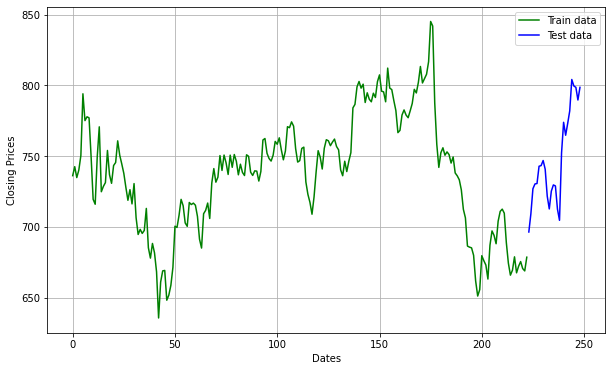

In [21]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_train.Close, 'green', label='Train data')
plt.plot(df_valid.Close, 'blue', label='Test data')
plt.legend()

In [22]:
# ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train['Close'], order=(14,1,17))
result = model.fit()

C:\Users\electromera\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\electromera\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\electromera\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  223
Model:               ARIMA(14, 1, 17)   Log Likelihood                -854.163
Date:                Sat, 12 Feb 2022   AIC                           1772.326
Time:                        23:02:33   BIC                           1881.212
Sample:                             0   HQIC                          1816.288
                                - 223                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2837      0.804     -0.353      0.724      -1.860       1.292
ar.L2          0.1090      0.611      0.179      0.858      -1.088       1.306
ar.L3         -0.2522      0.283     -0.890      0.374      -0.808       0.303
ar.L4         -0.2384      0.174     -1.367      0.172      -0.580       0.104
ar.L5         -0.3505      0.213     -1.649      0.099      -0.767       0.066
ar.L6          0.0491      0.333      0.148      0.883      -0.603       0.701
ar.L7         -0.2596      0.157     -1.656      0.098      -0.567       0.048
ar.L8         -0.3947      0.245     -1.608      0.108      -0.876       0.086
ar.L9         -0.4240      0.441     -0.961      0.336      -1.288       0.440
ar.L10        -0.2140      0.426     -0.502      0.616      -1.049       0.621
ar.L11         0.2358      0.312      0.755      0.450      -0.377       0.848
ar.L12        -0.6618      0.337     -1.962      0.050      -1.323      -0.001
ar.L13        -0.3907      0.394     -0.993      0.321      -1.162       0.381
ar.L14         0.0931      0.539      0.173      0.863      -0.964       1.150
ma.L1          0.3519      0.802      0.439      0.661      -1.221       1.925
ma.L2         -0.1924      0.657     -0.293      0.770      -1.480       1.095
ma.L3         -0.0316      0.466     -0.068      0.946      -0.944       0.881
ma.L4          0.2589      0.315      0.821      0.412      -0.359       0.877
ma.L5          0.5837      0.377      1.547      0.122      -0.156       1.323
ma.L6         -0.1467      0.618     -0.237      0.812      -1.358       1.064
ma.L7          0.1333      0.356      0.374      0.708      -0.565       0.831
ma.L8          0.5137      0.475      1.081      0.280      -0.418       1.446
ma.L9          0.5253      0.458      1.146      0.252      -0.373       1.423
ma.L10         0.1068      0.619      0.172      0.863      -1.107       1.321
ma.L11        -0.4493      0.351     -1.281      0.200      -1.137       0.238
ma.L12         0.6210      0.600      1.035      0.301      -0.555       1.797
ma.L13         0.5143      0.408      1.261      0.207      -0.285       1.313
ma.L14         0.0701      0.614      0.114      0.909      -1.133       1.273
ma.L15        -0.1001      0.290     -0.345      0.730      -0.668       0.468
ma.L16        -0.1106      0.177     -0.625      0.532      -0.457       0.236
ma.L17         0.2061      0.221      0.935      0.350      -0.226       0.638
sigma2       121.8610     32.289      3.774      0.000      58.575     185.147
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                33.37
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.35
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.76
========================================================

In [24]:
start = len(df_train)
end = len(df_train + df_valid)-1

In [25]:
pred = result.predict(start=start, end=end, dynamic=False)
pred = pd.DataFrame(pred)
 

In [26]:
df1=pd.concat([df_valid.Date , df_valid.Close , pred], axis=1)
df1

,Date,Close,predicted_mean
223,2022-01-03,696.349976,686.576440
224,2022-01-04,709.150024,682.955498
225,2022-01-05,726.900024,681.164039
226,2022-01-06,730.299988,675.004178
227,2022-01-07,730.599976,676.282816
228,2022-01-10,742.799988,664.273532
229,2022-01-11,743.250000,662.021873
230,2022-01-12,746.849976,663.670358
231,2022-01-13,740.700012,660.948817
232,2022-01-14,721.700012,660.645442


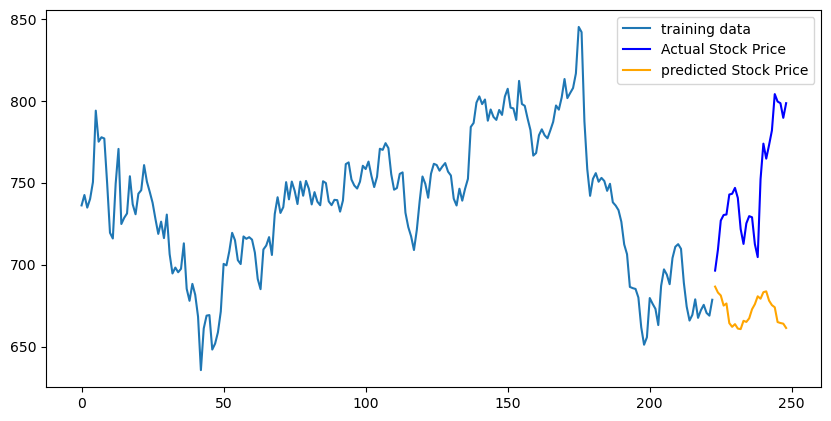

In [27]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(df_train.Close, label='training data')
plt.plot(df_valid.Close, color = 'blue', label='Actual Stock Price')
plt.plot(pred, color = 'orange', label='predicted Stock Price')
plt.legend()
plt.show()

In [28]:
fc = result.forecast()
fc

223    686.57644
dtype: float64

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(df_valid.Close, pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(df_valid.Close, pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(df_valid.Close, pred))
print('RMSE: '+str(rmse))


MSE: 6985.847584393516
MAE: 75.74811762020218
RMSE: 83.58138300120139
